In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tinycp.classifier import BinaryClassConditionalConformalClassifier
from tinycp.plot import efficiency_curve, reliability_curve, histogram, confusion_matrix, beta_pdf_with_cdf_fill
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
import numpy as np

In [22]:
weights = [0.2, 0.8]

X, y = make_classification(
    n_samples=100000, 
    n_features=20, 
    n_informative=2,      
    weights=weights, 
    random_state=42,
    n_redundant=2)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [24]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1, class_weight="balanced", max_depth=int(np.ceil(np.log2(len(X_train)) - 1)))
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       oob_score=True, random_state=42)

In [25]:
clf = BinaryClassConditionalConformalClassifier(rf)
clf.fit(y=y_train, oob=True)

BinaryClassConditionalConformalClassifier(learner=RandomForestClassifier(class_weight='balanced',
                                                                         max_depth=15,
                                                                         n_jobs=-1,
                                                                         oob_score=True,
                                                                         random_state=42))

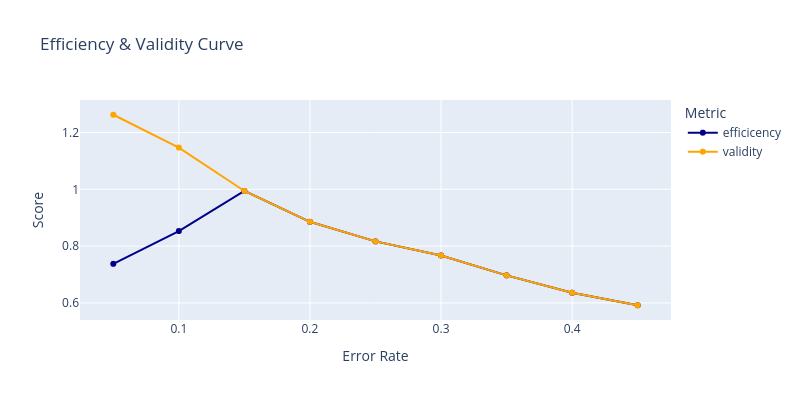

In [26]:
efficiency_curve(clf, X_test, "png")

In [27]:
clf.calibrate(X_calib, y_calib, func="mcc")


0.14

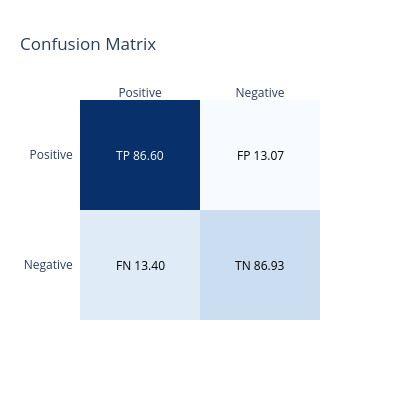

In [28]:
confusion_matrix(clf, X_test, y_test, fig_type="png")

In [29]:
clf.evaluate(X_test, y_test)

{'total': 20000,
 'alpha': 0.14,
 'coverage_rate': 0.866,
 'one_c': 0.994,
 'avg_c': 0.994,
 'empty': 0.006,
 'error': 0.134,
 'log_loss': 0.23,
 'ece': 0.003,
 'bm': 0.735,
 'mcc': 0.656,
 'f1': 0.912,
 'fpr': 0.131}

Random Forest

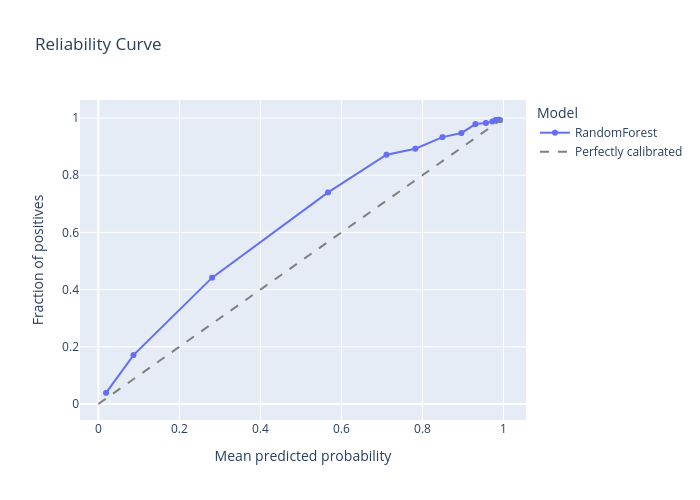

In [30]:
reliability_curve(clf.learner, X_test, y_test, 15,  "png")

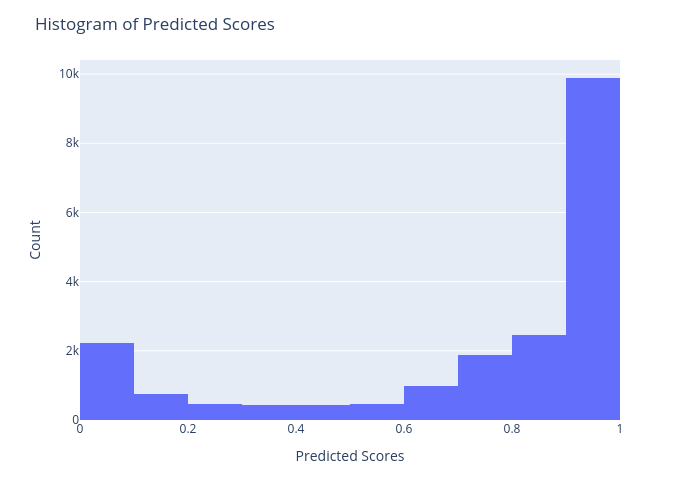

In [31]:
histogram(clf.learner, X_test, 15, "png")

Venn Abers

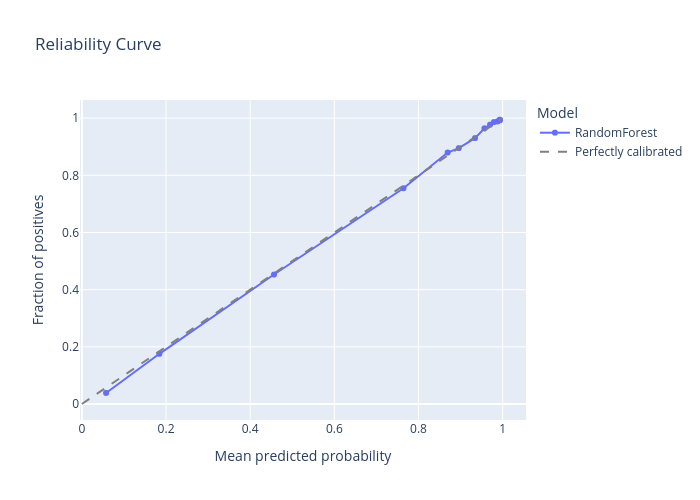

In [32]:
reliability_curve(clf, X_test, y_test, 15, "png")

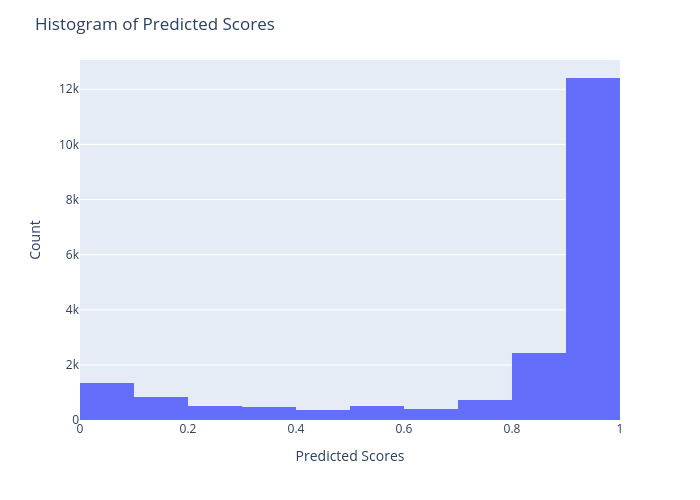

In [33]:
histogram(clf, X_test, 15, "png")

Alpha - 0.05

In [34]:
clf.evaluate(X_test, y_test, alpha=0.05)

{'total': 20000,
 'alpha': 0.05,
 'coverage_rate': 0.952,
 'one_c': 0.737,
 'avg_c': 1.263,
 'empty': 0.0,
 'error': 0.048,
 'log_loss': 0.23,
 'ece': 0.003,
 'bm': 0.627,
 'mcc': 0.506,
 'f1': 0.799,
 'fpr': 0.047}

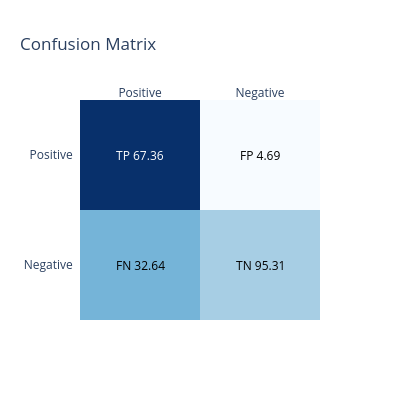

In [35]:
confusion_matrix(clf, X_test, y_test, alpha=0.05, fig_type="png")

Alpha - 0.10

In [36]:
clf.evaluate(X_test, y_test, alpha=0.10)

{'total': 20000,
 'alpha': 0.1,
 'coverage_rate': 0.92,
 'one_c': 0.853,
 'avg_c': 1.147,
 'empty': 0.0,
 'error': 0.081,
 'log_loss': 0.23,
 'ece': 0.003,
 'bm': 0.687,
 'mcc': 0.569,
 'f1': 0.855,
 'fpr': 0.073}

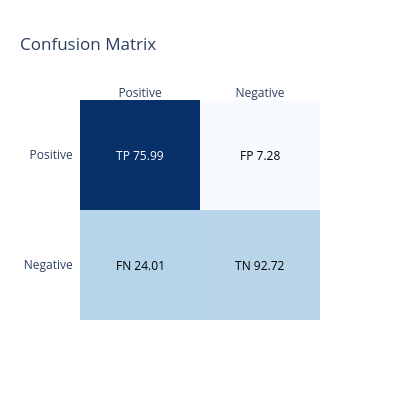

In [37]:
confusion_matrix(clf, X_test, y_test, alpha=0.10, fig_type="png")

In [38]:
tn, fp, fn, tp = sklearn_confusion_matrix(y_test, clf.predict(X_test)).ravel()

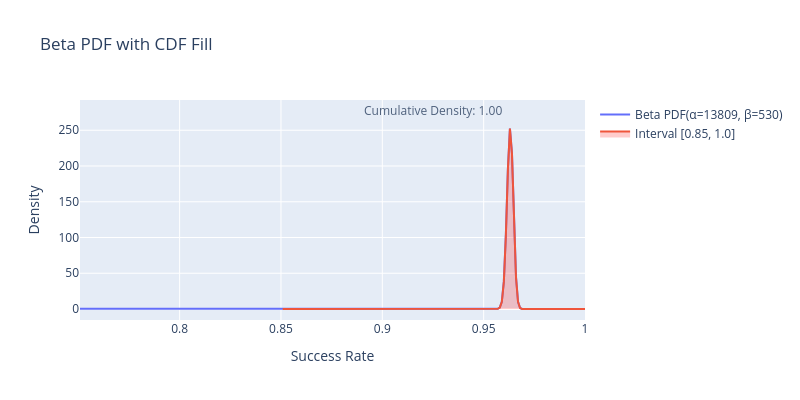

In [39]:
beta_pdf_with_cdf_fill(tp, fp, start=0.85, fig_type="png")

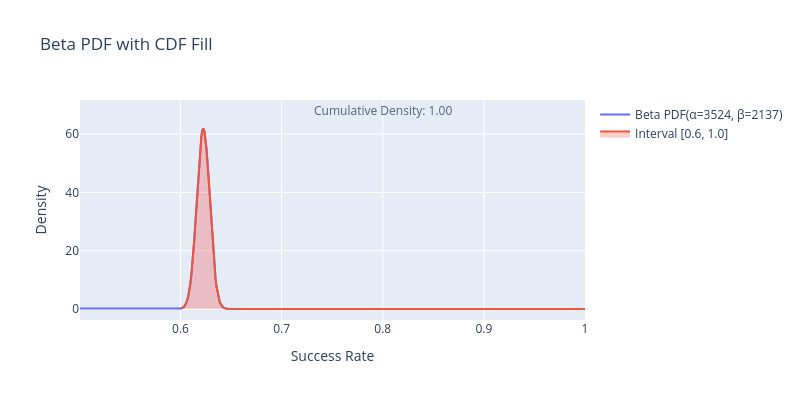

In [40]:
beta_pdf_with_cdf_fill(tn, fn, start=0.6, fig_type="png")